### 基于wineind数据集，分析自相关性

In [1]:
import warnings
warnings.filterwarnings("ignore")

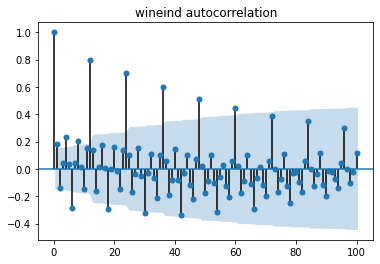

In [2]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import pandas as pd
wineind = pd.read_csv("http://image.cador.cn/data/wineind.csv")
plot_acf(wineind.销量, lags=100, title="wineind autocorrelation").show()

### 按一年为周期，对比从1980年到1993年的销量数据

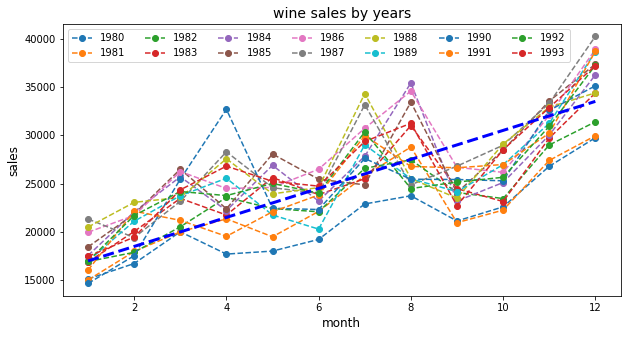

In [3]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
for i in range(int(wineind.shape[0]/12)):
    plt.plot([x+1 for x in range(12)],wineind.销量[12*i:12*(i+1)],'o--',label=wineind.月份[12*i].split('-')[0])
plt.legend(ncol=7)
# 添加辅助线
plt.plot([x+1 for x in range(12)],[1500*x+17000 for x in range(12)],'b--',linewidth=3)
plt.xlabel("month",fontsize=12)
plt.ylabel("sales",fontsize=12)
plt.title("wine sales by years",fontsize=14)
plt.show()

### 转换数据，并绘制散点矩阵图

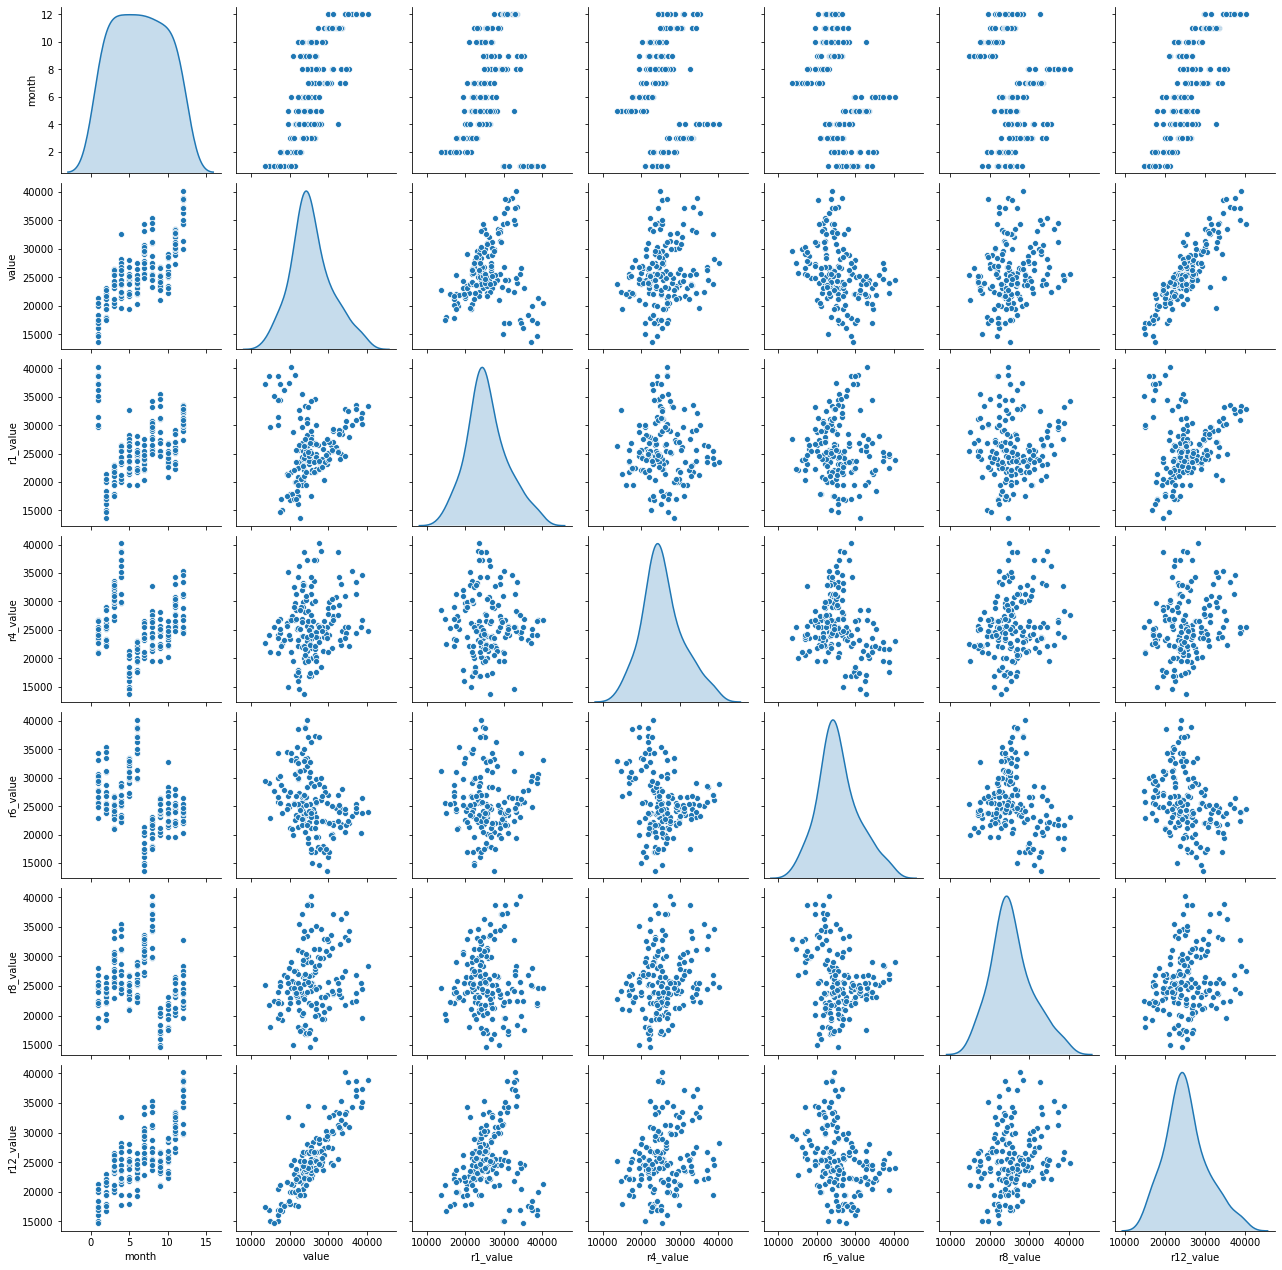

In [4]:
wineind['month']=[int(x.split("-")[1]) for x in wineind.月份]
wineind['value']=wineind.销量
temp = [None]*12 + wineind.value.tolist()
for loc in [1,4,6,8,12]:
    wineind['r'+str(loc)+'_value']=temp[(12-loc):][0:wineind.shape[0]]
pdata=wineind.dropna().drop(columns=['月份','销量'])

#画出散点矩阵图
import seaborn as sns
sns.pairplot(pdata,diag_kind='kde')

### 识别杠杆点

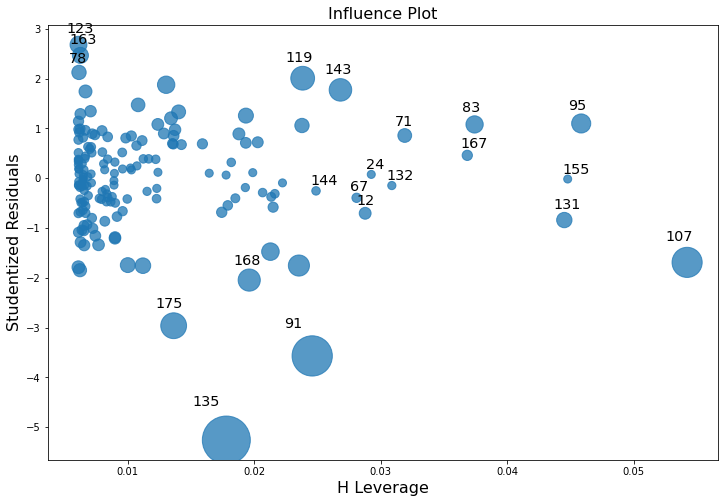

In [5]:
import statsmodels.api as sm
fig, ax = plt.subplots(figsize=(12,8))

#使用普通最小二乘法拟合一条线
lm = sm.OLS(pdata.value, sm.add_constant(pdata.r12_value)).fit()
sm.graphics.influence_plot(lm, alpha  = 0.05, ax = ax, criterion="cooks")
plt.show()

### 标记杠杆点

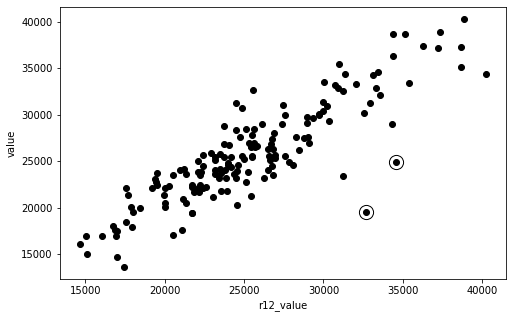

In [6]:
t0 = wineind.loc[[91,135],]
plt.figure(figsize=(8,5))
plt.plot(wineind.r12_value,wineind.value,'o',c='black')
plt.scatter(t0.r12_value,t0.value,marker='o',c='white',edgecolors='k',s=200)
plt.xlabel("r12_value")
plt.ylabel("value")
plt.show()

### 去掉杠杆点

In [7]:
pdata = pdata.drop(index=[91,135])